<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch3~4_pg_175~227_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 머신러닝 완벽가이드 ch3 ~ 4 pg. 175~227 필사

##6. 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트: 북아메리카 피마 지역 원주민의 type-2 당뇨병 결과 데이터-> 당뇨 원인은 식습관과 유전이라 함, 고립된 유전적 특성 때문에 연구

-> 피처: pregnancies 임신 횟수, flucose 포도당 부하 검사 수치, bloodpressure 혈압, skinthickness 팔 삼두근 뒤똑의 피하지방 측정값, insulin 혈청 인슐린, bmi 체질량지수, diabetespredigreefunction 당뇨 내력 가중치 값, age 나이, outcome 클래스 결정값

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


-> negative가 더 많음

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


feature 타입과 null 개수 : null 없고 피처 타입 모두 숫자형

로지스틱 회귀 이용해 예측 모델 생성

-> 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 나누고 학습 데이터 세트와 테스트 데이터 세트로 분리


In [4]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


In [5]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [6]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # x축을 threshold 값, y축을 정밀도, 재현율로 그리기
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: thresholds_boundary], linestyle= '--', label='precision')
    plt.plot(thresholds, recalls[0: thresholds_boundary], label='recall')

    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [7]:
def get_clf_eval(y_test, pred=None,pred_prova=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC_AUC 추가
    roc_score = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('\n정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nF1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1,roc_score))


In [8]:
#피처 데이터 세트 x, 레이블 데이터 세트 y 추출
#맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
Ir_clf = LogisticRegression(solver='liblinear')
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]

정확도: 0.7727
정밀도: 0.7111
재현율: 0.5926
F1: 0.6465, AUC:0.8083


전체 데이터의 65%가 negative 이므로 정확도보다 재현율 성능에 더 초점 맞추자. 일단 정밀도 재현율 곡선 보고 임계값 별 정밀도와 재현율 값의 변화 확인

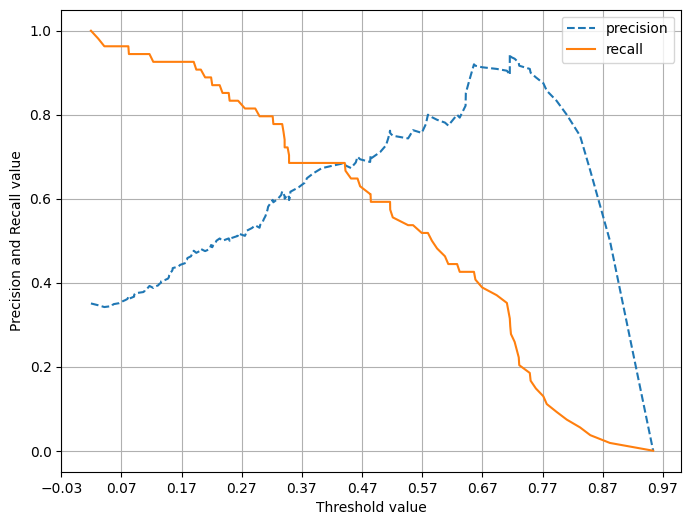

In [9]:
pred_proba_c1 = Ir_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 균형 맞을 듯, 하지만 두 개의 지표 모두 0.7이 안되는 수치로 값이 낮음

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min()값이 0으로 말이 되지 않는 수치

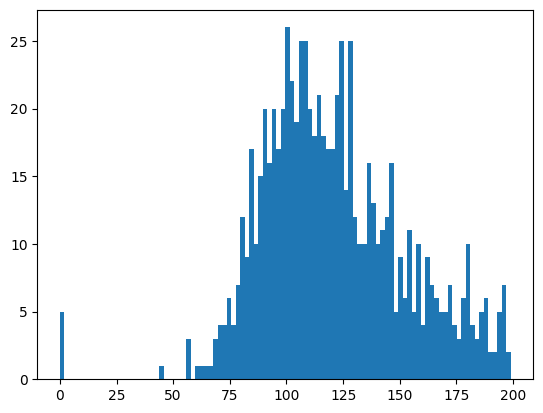

In [11]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

min()값이 0으로 돼있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

In [12]:
#0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0}0 건수는 {1}, 퍼센트는{2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose0 건수는 5, 퍼센트는0.65%
BloodPressure0 건수는 35, 퍼센트는4.56%
SkinThickness0 건수는 227, 퍼센트는29.56%
Insulin0 건수는 374, 퍼센트는48.70%
BMI0 건수는 11, 퍼센트는1.43%


위 피처의 0 값을 평균값으로 대체

In [13]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환

이후에 다시 학습/테스트 데이터 세트를 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인



In [14]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

#standardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
Ir_clf = LogisticRegression()
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804, AUC:0.8433


분류 결정 임곗값을 0.3에서 0.5까지 0.03 씩 변화시키면서 성능 수치가 어느 정도 개선되는지 확인

In [15]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = Ir_clf.predict_proba(X_test)
#get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1), thresholds)

로지스틱 회귀 모델 이용해 임곗값 0.48로 낮추고 다시 예측

In [16]:
#임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 Ir_clf.predict_proba() 예측 확률 array 에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
#get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

재현율이 상대적으로 더 중요한 지표인 경우: 암 양성 예측 모델과 같이 실제 positive 양성인 데이터 예측을 negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

-> 특별히 강조돼야 할 경우 분류의 결정 임계값 조정해 높이자

##chapter 4 분류

지도학습: 레이블, 즉 명시적 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

-> 분류: 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델 생성, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측(패턴 인지후)

-> ex: 나이브 베이즈, 로지스틱 회귀, 결정트리, 서포트 벡터 머신, 최소근접 알고리즘, 신경망, 앙상블 중 앙상블 집중

-앙상블: 서로 다른/또는 같은 알고리즘 단순히 결합 형태도 있으나 일반적으로 배깅(랜덤 포레스트), 부스팅(그래디언트 부스팅이 효시)

-결정트리: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙 만들기(if/else 기반)

-> 규칙노드는 규칙 조건, 리프 노드는 결정된 클래스값, 새로운 규칙 조건마다 서브 트리 생성 -> 트리 깊이 깊어질수록 결정 트리 에측 성능 저하

-균일도: 엔트로피를 이용한 정보 이득 지수(1-엔트로피 지수)와 지니계수

1. 데이터 집합의 모든 아이템이 같은 분류에 속하는 지 확인 -> 2.1  리프 노드로 만들어서 분류 결정 -> 2.2 데이터를 분할하는데 가장 좋은 속성과 분할 기준 찾기-> 3. 해당 속성과 분할 기준으로 데이터 분할해 branch 노드 생성-> 4. recursive하게 모든 데이터 집합의 분류가 결정될 때까지 수행

-혼잡도

-결정트리 모델 장점: 쉽고, 직관적, 피터의 스케일링이나 정규화 등 사전 가공 영향도가 크지 않음

-결정트리 모델의 단점: 과적합으로 정확도도 떨어짐(정확도 높이기 위해 조건 계속 추가하면서 깊이 계속 커지고 결국 복잡한 학습 모델되면 에측 성능 떨어짐: 사전에 크기 제한)

-결정 트리 파라미터: min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

-결정 트리 모델 시각화: Graphviz 패키지 사용, export_graphviz()는 함수 인자로 학습완료된 estimator, 피처 이름 리스트, 레이블 이름 리스트 입력하면 실제 트리형태로 시각화

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier()

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

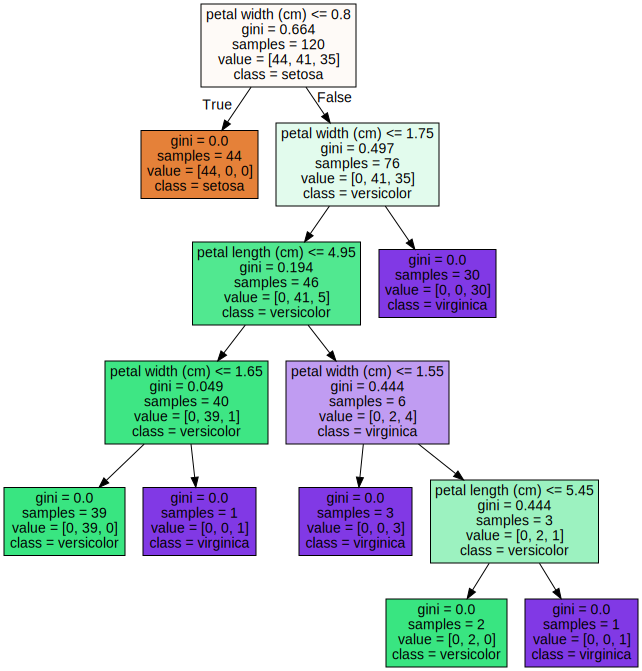

In [18]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf,
                out_file="tree.dot",
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True,
                filled=True)

# 생성한 tree.dot파일을 읽어서 jupyter notebook 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

graphviz의 파이썬 래퍼 모듈 호출해 결정 트리의 규칙을 시각적으로 표현 -> 트리의 브랜치 노드와 말단 리프 노드가 어떻게 구성되는지 시각화

-자식 없는 노드가 리프 노드: 최종 클래스 값이 결정되는 노드

-자식 있는 노드가 브랜치 노드: 자식 만들기 위한 분할 규칙 조건 가지고 잇음

1번 노드(petal length<=2.45) -> 2번/3번

2번(모든 데이터가 setosa인 리프 노드) : 지니계수 0

3번 (petal length</2.45 false인 규칙 노드로 지니계수가 0.5로 높아  petalwidth<=1.55 규칙으로 자식 생성) -> 4번/5번

4번 (petal width<=1.55 true, 지니계수 낮으나 혼재되어있어 petal length<=5.25 규칙으로 자식 노드 생성)

5번 (petal width<=1.55 false, 지니계수 낮으나 혼재되어 있어 petal width<=1.75 규칙으로 자식 노드 생성)

-각 노드 색 붓꽃 데이터 레이블 값, 주황 0: setosa, 초록 1: versicolor, 보라 2: virginica -> 색 짙어질수록 지니계수 낮고 해당 레이블에 속하는 샘플 데이터 많음

-미리 규칙생성로직 제어해야함 아님 과적합 높아짐

-결정트리의 max_depth 하이퍼 파라미터 변경에 따른 트리 변화, min_samples_split 하이퍼 파라미터 변경에 따른 규칙 트리 변화, min_samples_leaf 하이퍼 파라미터 변경에 따른 결정 트리의 변화

-fit()으로 학습된 decisiontreeclassifier 객체 변수인 df_clf에서 feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 막대그래프로 표현

Feature importance:
[0.    0.    0.071 0.929]
sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.071
petal width (cm):0.929


<Axes: >

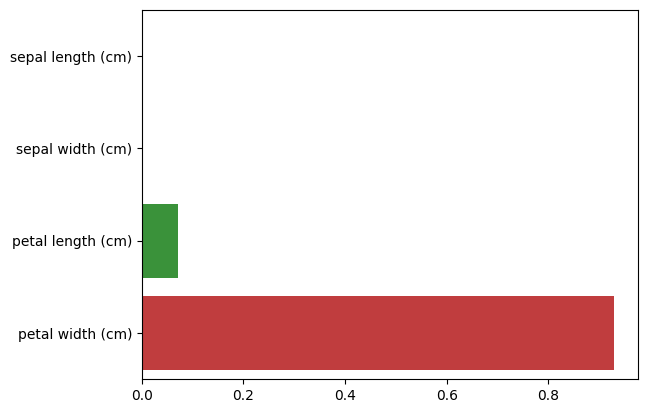

In [19]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

#feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

-결정 트리 과적합 문제 시각화

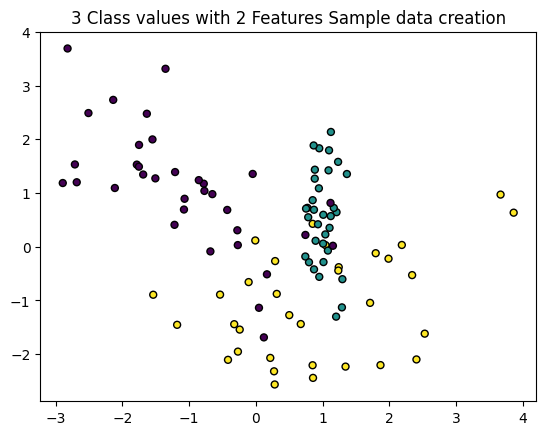

In [20]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,\
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

<ipython-input-22-ffe36852780b>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


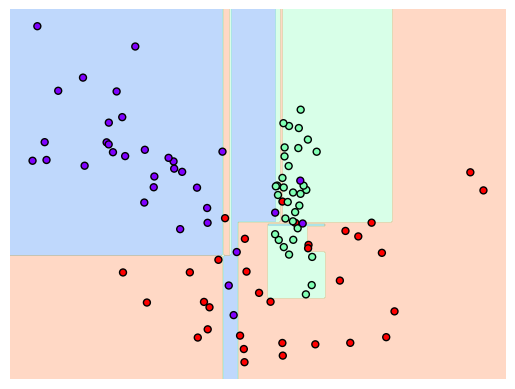

In [22]:
# 결정 기준 경계 시각화
from sklearn.tree import DecisionTreeClassifier


def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 특정한 트리 생성 제약 없는 결정 트리의 학습가 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

일부 이상치(Outlier) 데이터까지 분류해 결정 기준 경계가 매우 많아짐

복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어짐.

min_samples_leaf = 6 설정해 6개 이하의 데이터는 리프 노드를 생성하 수 있도록 리프 노드 생성 규칙을 완화

<ipython-input-22-ffe36852780b>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


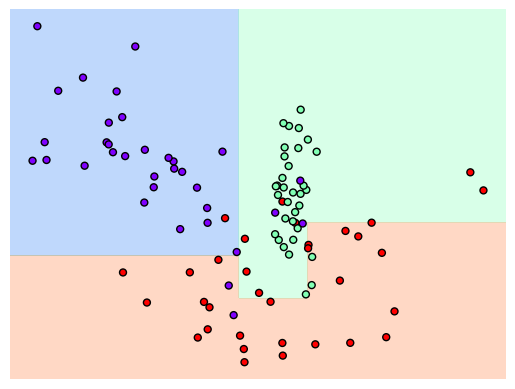

In [23]:
# min_samples_leaf = 6 으로 트리 생성 조건을 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

-> 더 일반화된 분류 규칙에 따라 분류됨

결정 트리 실습 - 사용자 행동 인식 데이터 세트: 수집된 피처 세트 기반 결정 트리 이용해 어떤 동작인지 예측

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있다. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/features.txt',sep='\s+',\
                             header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출 : ',feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체 움직임 관련 속성의 평균/표준편차가 X,Y,Z 축 값으로 돼 있음

-중복된 피처명 얼마나 있나?

In [26]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


중복된 피처수 42개니 이름 _1또는 _2를 추가해 바꾸기

In [27]:

# 중복된 피처 이름 바꾸기

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)

    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [28]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/features.txt',sep='\s+',\
                             header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_Df()를 이용, 신규 피처명은 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    x_train = pd.read_csv('/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame
    return x_train, x_test, y_train, y_test

In [42]:
x_train, x_test, y_train, y_test = get_human_dataset()
print('## 학습 피처 데이터셋 info()')
print(x_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [43]:
# 레이블 분포도 값 확인
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [44]:
# 동작 예측 분류 수행
# 하이퍼파라미터 전부 추출

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n',dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [45]:
# 트리 깊이가 예측 정확도에 주는 영향을 확인

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


max_depth 증가에 따라 예측 성능 어떻게 변했는지 확인

In [46]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올진 모르지만 검증 데이터 세트에서 오히려 과적합으로 성능 저하 유발

별도의 테스트 데이터 세트에서 결정 트리 정확도 측정

In [48]:
max_depths=[6,8,10,12,16,20,24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(x_train , y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


test dataset에서는 max_depth가 8일 때 87.07%로 가장 높은 정확도를 보임

max_depth가 8을 넘어가면 정확도가 점점 감소하는 것을 볼 수 있음

max_depth와 min_samples_split을 같이 변경하면서 정확도를 튜닝

In [50]:
params = {'max_depth' : [8, 12, 16, 20], 'min_samples_split' : [16, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8, min_samples_split이 16인 경우에 가장 높은 정확도

In [54]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


학습에 가장 중요한 영향을 미치는 feature 20개를 막대그래프로 시각화

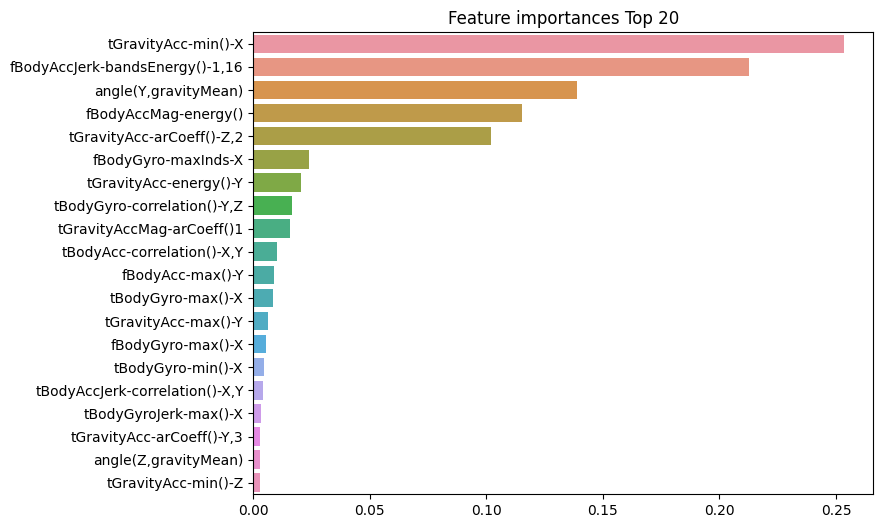

In [55]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

3. 앙상블 학습:  여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법 -> 랜덤 포레스트와 그래디언트 부스팅

앙상블 학습의 유형으로는 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)

배깅- 랜덤포레스트

보팅-선형회귀, 서포트벡터머신, k최근접이웃

스태킹- 여러 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과 예측

보팅 유형 - 하드 보팅(다수결)과 소프트 보팅(확률 평균 높)

-보팅 분류기: VotingClassifier 클래스 이용 위스콘신 유방암 데이터 세트 예측 분석 : 로지스틱 회귀와 knn 기반 보팅 분류기 만들자


In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [56]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


결과를 보면 보팅 분류기가 조금 높게 나왔는데, 보팅으로 여러 분류기를 결합한다고 해서 무조건 성능이 향상되는 것은 아님

결정 트리 알고리즘의 장점은 그래도 취하고 단점은 보완하면서 bias-variance trade-off의 효과를 극대화

4. 랜덤 포레스트

배깅(Bagging)의 대표적인 알고리즘은 랜덤 포래스트로 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지며, 다양한 영역에서 높은 예측 성능을 보임

RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원-> 사용자 행동 인식 dataset을 이용하여 예측을 수행

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


랜덤 포레스트 하이퍼 파라미터 밑 튜닝

트리 기반의 앙상블 알고리즘의 단점: hyper parameter가 너무 많아 튜닝 시간이 많이 소모되는 것이고, 많은 시간을 소모하여 튜닝을 한 후에도 예측 성능은 크게 상향되지 않음(랜덤 포레스트가 적은 편에 속하는데 결정 트리를 사용하여 hyper parameter가 대부분 동일해서)

n_extimate, max_features

GridSearchCV 이용해 랜덤포레스트 하이퍼 파라미터 튜닝

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


hyper parameter를 그대로 사용하고 n_estimator만 300으로 증가시키고 다시 학습한 후 예측 성능을 측정해보고 feature의 중요도를 막대그래프로 시각화

In [59]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


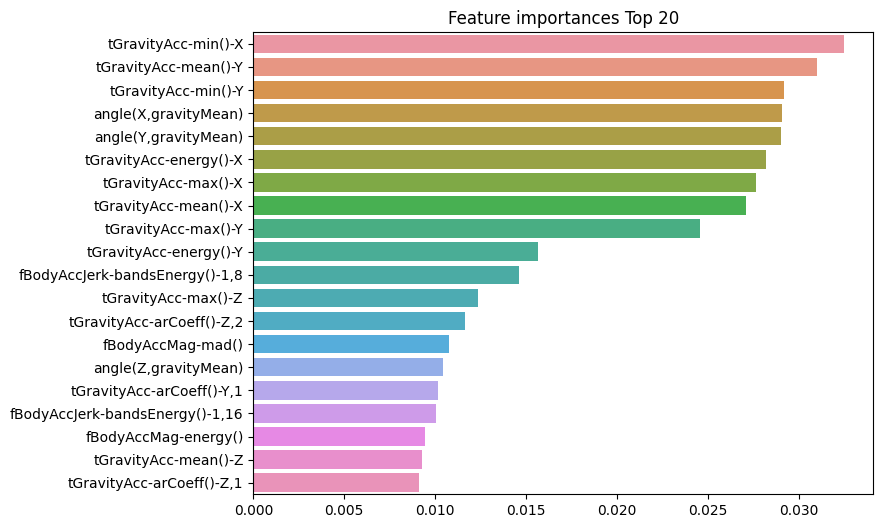

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

GBM

부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습/예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

부스팅의 대표적인 구현: AdaBoost(Adaptive boosting)과 그래디언트 부스트(Gradient Boost)

"+"와 "-"로 구성된 피쳐 dataset이 있다면 weak learner 분류기 1이 step 1에서 분류를 하고 step 2에선 잘못 분류한 data에 가중치를 부여한다. 이 과정을 step 5까지 반복하면 총 3개의 weak learner 분류기를 통해 분류를 하게 되고 1개의 weak learner 분류기를 사용할 때보다 정확도가 높아진 것을 알 수 있음

사이킷런의 GBM을 이용해 사용자 행동 dataset을 예측 분류해 보고, 학습 시간도 같이 확인해보자

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 957.2 초 


GBM 하이퍼 파라미터 밑 튜닝

loss, learning_rae, n_estimators, subsample

GridSearchCV 이용해 하이퍼 파라미터 최적화

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

해당 hyper parameter 설정으로 테스트 dataset에도 적용하여 예측 정확도를 확인

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이지만 수행 시간이 오래 걸린다는 단점 존재

가장 각광 받고 있는 2개의 Gradient Boosting 기반의 ML 패키지: XGBoost와 LightGBM